# This file contains function to generate 2-dimention k-foldable shell-shell pairs.

In [1]:
##mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
import csv

In [0]:
base_path = '/content/drive/My Drive/DL_exp/'

In [0]:
### visualize data points 
# Input: (n,2) numpy array for data points and (n,1) numpy array for labels (values: 0 or 1)
def plot_2D_data(points,labels):
    plt.scatter(points[np.where(labels == 1)[0],0],points[np.where(labels == 1)[0],1])
    plt.scatter(points[np.where(labels == 0)[0],0],points[np.where(labels == 0)[0],1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

* Foldable-Shell Data can have k 2-dimension shell-shell pairs.
* A shell is generated by a direction chosen uniformly at random and a norm drawn uniformly at random from the interval [radius_of_shell-thickness_of_shell/2), radius_of_shell+(thickness_of_shell/2)].

##### Input : 
* num_samples : number of samples (integer number)
* points_dim : dimension of shell (integer number)
* center : center of the shell(integer number)
 * [+/- center, +/- center]
* kfold : number of shell-shell pairs(integer number)
* radius_of_shell : list of radius of k shells (list of k elements)
* thickness_of_shell : list of thickness of k shells (list of k elements)
* label_of_shell : list of label of k shells (list of k elements)
* seed 

##### Output :
* return geterated data numpy array of (n X (d+1)) dimension. 
where, n is numer of samples and d is shell dimension. Last column is label.

In [0]:
def shell_k_fold_data(num_samples,points_dim,center,kfold,radius_of_shell,thickness_of_shell,label_of_shell,seed=1234):
  # generate points on circle of unit radius 
  np.random.seed(seed)
  a = np.random.uniform(-1.0, 1.0, (num_samples,points_dim))
  norm = np.sqrt(np.sum(np.square(a),axis=1))
  unit_circle = a/norm[:,None]
  data = np.zeros((num_samples,points_dim+1))
  
  for i in range(num_samples):
    if i%(2*kfold)==0:
      data[i,:-1] = (radius_of_shell[0]*unit_circle[i,:])+[center,center]
      data[i,-1] =  label_of_shell[0]
    if i%(2*kfold)==1:
      data[i,:-1] = (radius_of_shell[1]*unit_circle[i,:])+[center,center]
      data[i,-1] =  label_of_shell[1]
    if i%(2*kfold)==2:
      data[i,:-1] = (radius_of_shell[0]*unit_circle[i,:])+[-center,center]
      data[i,-1] =  label_of_shell[0]
    if i%(2*kfold)==3:
      data[i,:-1] = (radius_of_shell[1]*unit_circle[i,:])+[-center,center]
      data[i,-1] =  label_of_shell[1]
    if i%(2*kfold)==4:
      data[i,:-1] = (radius_of_shell[0]*unit_circle[i,:])+[-center,-center]
      data[i,-1] =  label_of_shell[0]
    if i%(2*kfold)==5:
      data[i,:-1] = (radius_of_shell[1]*unit_circle[i,:])+[-center,-center]
      data[i,-1] =  label_of_shell[1]
    if i%(2*kfold)==6:
      data[i,:-1] = (radius_of_shell[0]*unit_circle[i,:])+[center,-center]
      data[i,-1] =  label_of_shell[0]
    if i%(2*kfold)==7:
      data[i,:-1] = (radius_of_shell[1]*unit_circle[i,:])+[center,-center]
      data[i,-1] =  label_of_shell[1]

  np.random.shuffle(data)
  return data

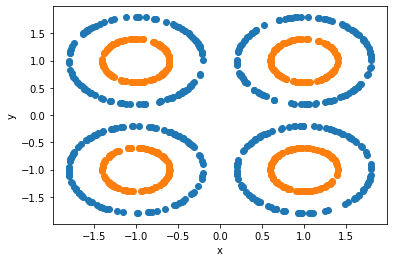

In [9]:
points_dim = 2
num_samples = 1000
center = 1
kfold = 4
radius_of_shell=[0.4,0.8]
thickness_of_shell = [0,0]
label_of_shell = [0,1]

data = shell_k_fold_data(num_samples,points_dim,center,kfold,radius_of_shell,thickness_of_shell,label_of_shell)
plot_2D_data(data[:,:-1],data[:,-1])